In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydelfi.priors as priors
import pydelfi.ndes as ndes
import pydelfi.delfi as delfi
import pydelfi.score as score
%matplotlib inline

In [20]:
d = np.random.normal()
print(d)

1.4956721910765605


In [21]:
dmudt.shape

(1, 1)

In [24]:
n_vec = 1
q_fid = np.array([0.])
mu = np.array([0.])
Cinv = np.reshape(np.array([1.]), [1, 1])
dmudt = np.reshape(np.array([1.]), [1, 1])
Compressor = score.Gaussian(n_vec, q_fid, mu = mu, Cinv = Cinv, dmudt = dmudt)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args=None):
    return Compressor.scoreMLE(d)
compressor_args = None

In [25]:
compressor(d) == d

array([ True])

In [77]:
n = 10000
n_vec = 100
d = np.zeros((n, n_vec))
for i in range(n):
    for j in range(n_vec):
        d[i, j] = np.random.normal(j, 1, 1)
print(d)

[[ -1.4265882    1.38364793   3.64846446 ...  97.16615647  98.77114926
   99.63362407]
 [  1.35824524   0.1269963    2.3232292  ...  96.89245909  98.29946614
   99.25322133]
 [ -0.83478696  -0.52672792   1.70162831 ...  98.32455781  97.56777673
   98.15036665]
 ...
 [ -0.78174235   4.34180433   3.5001767  ...  97.69182138  97.81843264
   98.02667392]
 [  2.19855571   0.8767951    4.59470643 ...  95.63706424 100.44867891
   99.14546875]
 [ -0.51666275   3.3289603    2.00312251 ...  99.88353783  97.02631986
   99.26381239]]


In [78]:
covariance = np.cov(d, rowvar=False)

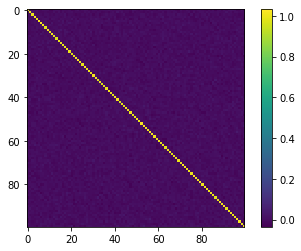

In [79]:
plt.imshow(covariance)
plt.colorbar();

In [80]:
q_fid = np.array([0.])
mu = np.arange(n_vec)
Cinv = np.eye(n_vec)
dmudt = np.reshape(np.ones((n_vec)), [1, -1])
Compressor = score.Gaussian(n_vec, q_fid, mu = mu, Cinv = Cinv, dmudt = dmudt)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args=None):
    return Compressor.scoreMLE(d)
compressor_args = None

In [88]:
compressor(d[0])

array([-0.07866765])

In [83]:
np.mean(d[:, 3])

3.0070179011366966

In [84]:
np.sum(d[1]-np.arange(n_vec))

6.596939200943595

In [87]:
np.dot(np.dot(dmudt, Cinv), d[0] - mu)

array([-7.866765])

In [90]:
np.dot(dmudt[0,:], np.dot(Cinv, (d[0] - mu)))

-7.866764998243159

In [91]:
Finv

array([[0.01]])

In [100]:
h = 0.01
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(n_vec):
        d_vec_p[i, j] = np.random.normal(j+q_fid_p, 1, 1)

mu_p = np.mean(d_vec_p, axis=0)
dmudt = (mu_p - mu)/h
print(dmudt)

[ 1.6834678  -0.01012592  1.10399377  0.80699     2.04619963  0.87220141
  2.56430693  0.82572181  0.60766001  1.66538529  1.2514215   1.65822107
 -0.27608588  0.46164661  1.18006857  1.29873458  2.11932786  0.17866196
  1.86662414  0.93327994  1.64965859  1.09670364  0.81178223  1.25409295
  0.35473289  1.38136854  0.3503424  -1.4271916   2.51258676  0.94373659
  0.70808565  1.40236243  1.53638755 -0.27972535  1.20103132 -0.23881712
  3.25424124  0.70600706  2.26959114  0.42016719  0.89851797  2.64881921
  0.69310961  0.90016909  2.25483952  1.0525906   2.07661403 -0.30398882
  2.22558658  1.93012921  2.30806343 -0.32956913  3.44076605  1.97350058
  1.66150194  0.57374817  0.91998539  1.45313285  1.5125607   1.35394053
  1.86773789  2.20234665  0.55983654  1.08271279  1.37930769 -0.06828159
  0.6149228   0.50857113  1.27694181  3.85021933  0.05119538 -0.27024233
  1.78993197  2.53176669  1.71510426 -0.21063102  1.08038727  1.04151097
  0.53591107  1.42736785  1.82681628  0.34652359  2

In [101]:
print(dmudt.sum())

117.30755892236823


In [162]:
# let's try with a new toy model then
# let's look at it at two different values
q1 = 1
q2 = 2
n = 1000
n_vec = 50
d1 = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d1[i, j-1] = np.random.gamma(j / q1**2, q1 / n_vec)
        
d2 = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d2[i, j-1] = np.random.gamma(j / q2**2, q2 / n_vec)

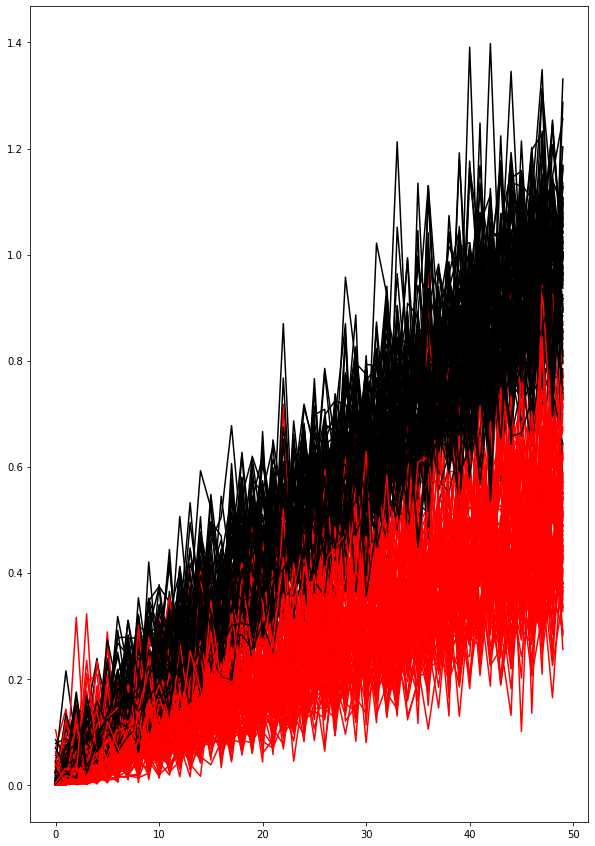

In [163]:
plt.figure(figsize=(10, 15))
for index in range(100):
    plt.plot(np.arange(n_vec), d1[index], color='k')
    plt.plot(np.arange(n_vec), d2[index], color='r')

In [164]:
# check the mean
np.mean(d2[:, -1])

0.5023924408667322

In [165]:
# check the variance, which does not depend on q
np.var(d1[:, -1])

0.019895665359096378

In [166]:
# the derivative can be obtained analitically
dmudt1 = -np.arange(n_vec)/(q1**2 * n_vec)
dmudt2 = -np.arange(n_vec)/(q2**2 * n_vec)

In [167]:
dmudt1

array([ 0.  , -0.02, -0.04, -0.06, -0.08, -0.1 , -0.12, -0.14, -0.16,
       -0.18, -0.2 , -0.22, -0.24, -0.26, -0.28, -0.3 , -0.32, -0.34,
       -0.36, -0.38, -0.4 , -0.42, -0.44, -0.46, -0.48, -0.5 , -0.52,
       -0.54, -0.56, -0.58, -0.6 , -0.62, -0.64, -0.66, -0.68, -0.7 ,
       -0.72, -0.74, -0.76, -0.78, -0.8 , -0.82, -0.84, -0.86, -0.88,
       -0.9 , -0.92, -0.94, -0.96, -0.98])

In [168]:
# we finally need to check the posterior
# we start from the theoretical one
# first we create an observation
d_obs = np.zeros((1, n_vec))
q_fid = 1.5
for j in range(1, n_vec+1):
    d_obs[0, j-1] = np.random.gamma(j / q_fid**2, q_fid / n_vec)

In [179]:
import scipy.special as sps
n_post = 1000
q_posterior = np.linspace(1, 2, n_post)
theo_post = np.zeros((n_post, 2))
for i, q in enumerate(q_posterior):
    y = 1
    scale = q/n_vec
    for j in range(1, n_vec+1):
        shape = j / q**2
        y *= d_obs[0, j-1]**(shape-1)*(np.exp(-d_obs[0, j-1]/scale) / (sps.gamma(shape)*scale**shape))
    theo_post[i] = q, y

In [180]:
theo_post[:, 1] = theo_post[:, 1] / np.sum(theo_post[:, 1])

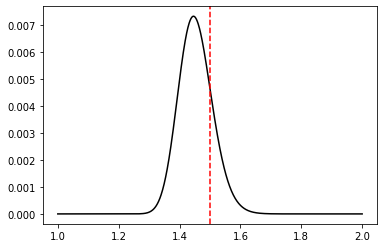

In [182]:
plt.plot(theo_post[:, 0],  theo_post[:, 1], c='k', label='Theoretical')
plt.axvline(q_fid, linestyle='--', color='r')

In [ ]:
# now we need to look at the compression,
# and then at the gaussianisation